In [33]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load your Euro Cup dataset (assuming it's in a CSV file named 'euro_cup_data.csv')
df = pd.read_csv(r'2016.csv')

# Selecting a subset of relevant features for clustering
selected_features = ['home_team', 'away_team', 'home_score', 'away_score', 
                     'winner', 'year', 'group_name', 'round', 'stadium_city', 'match_attendance']

# Create a new DataFrame with only the selected features
df_selected = df[selected_features].copy()

# Drop rows with missing values, if any
df_selected.dropna(inplace=True)

# Keep a copy of original home_score and away_score
df_selected['original_home_score'] = df_selected['home_score']
df_selected['original_away_score'] = df_selected['away_score']


In [34]:
# Encoding categorical variables if needed (using label encoding for simplicity)
from sklearn.preprocessing import LabelEncoder

label_encoder_home = LabelEncoder()
label_encoder_away = LabelEncoder()
df_selected['home_team'] = label_encoder_home.fit_transform(df_selected['home_team'])
df_selected['away_team'] = label_encoder_away.fit_transform(df_selected['away_team'])

# Select numerical features for clustering
numerical_features = ['home_score', 'away_score', 'year', 'match_attendance']

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
df_selected[numerical_features] = scaler.fit_transform(df_selected[numerical_features])

In [35]:
# Perform K-means clustering (assuming 5 clusters for demonstration)
kmeans = KMeans(n_clusters=4, random_state=42)
df_selected['cluster'] = kmeans.fit_predict(df_selected[numerical_features])

# Analyze the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=numerical_features)




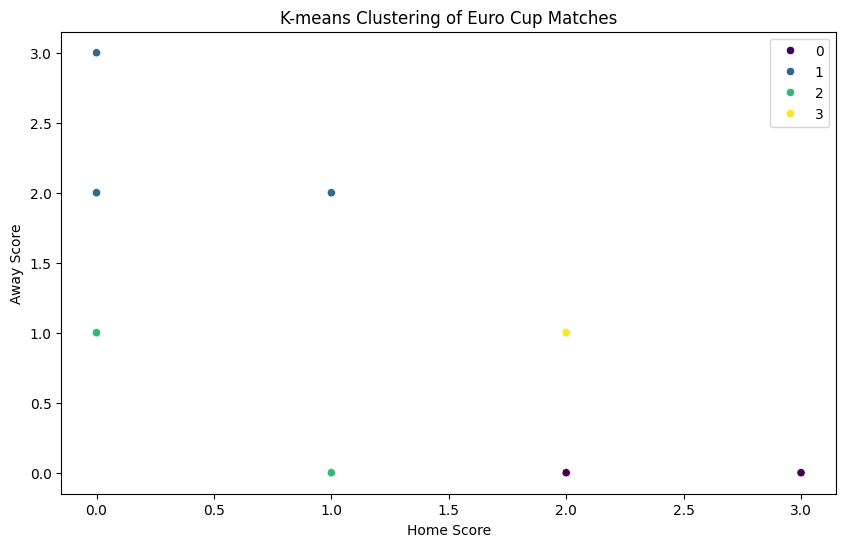

In [36]:
# Visualize clusters using original home_score and away_score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='original_home_score', y='original_away_score', data=df_selected, hue='cluster', palette='viridis', legend='full')
plt.title('K-means Clustering of Euro Cup Matches')
plt.xlabel('Home Score')
plt.ylabel('Away Score')
plt.legend()
plt.show()


In [37]:
# Examine cluster details
cluster_details = df_selected.groupby('cluster').agg({
    'home_team': 'count',
    'year': ['min', 'max'],
    'stadium_city': lambda x: x.value_counts().index[0],
    'match_attendance': ['mean', 'min', 'max']
}).reset_index()

print(cluster_details)

  cluster home_team year      stadium_city match_attendance            \
              count  min  max     <lambda>             mean       min   
0       0         6  0.0  0.0     Bordeaux        -0.441740 -0.770188   
1       1         6  0.0  0.0         Lyon        -0.221447 -1.136327   
2       2        10  0.0  0.0         Nice        -0.230644 -1.091451   
3       3         3  0.0  0.0  Saint-Denis         2.095187  1.654790   

             
        max  
0  0.001196  
1  0.992711  
2  1.270460  
3  2.571779  
